# 강화 학습 (Reinforcement learning) 1

## OpenAI gym 환경

In [1]:
!pip install gymnasium "gymnasium[toy-text]" keyboard

  Using cached keyboard-0.13.5-py3-none-any.whl.metadata (4.0 kB)
Using cached keyboard-0.13.5-py3-none-any.whl (58 kB)


In [12]:
import time
import random
import keyboard
import pygame

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import gymnasium as gym

### Frozen Lake environment

In [ ]:
## env import
env = gym.make("FrozenLake-v1", 
               desc = None, map_name = "4x4", is_slippery = False)
# env = gym.make('CartPole-v1')

## First state return


In [ ]:
env.reset()
# (0, {'prob': 1})

## action space return
env.action_space.n
# 4

## state space return
env.observation_space.n
# 16

# new_state, reward, terminated, truncated, info = env.step(action) 
# env.step(0)
# (0, 0.0, False, False, {'prob': 1.0})

# env.step(2)
# (1, 0.0, False, False, {'prob': 1.0})

env.step(3)

In [ ]:
## init env
env = gym.make("FrozenLake-v1", 
               desc = None, 
               map_name = "4x4", 
               is_slippery = False)

## init state
s, _ = env.reset()
print("inital state = {}".format(s))

env.action_space.n # range(4) = [0, 1, 2, 3]
print("action space = {}".format(env.action_space.n))

env.observation_space.n
print("observation space = {}".format(env.observation_space.n))

transitions = env.unwrapped.P
# display("transition = \n", transitions)

## action
action = env.action_space.sample()
print("action = {}".format(action))

obs, reward, terminated, truncated, _ = env.step(action)
print(obs, reward, terminated, truncated)

env.close()

### Frozen lake map

In [5]:
env = gym.make("FrozenLake-v1", desc = None,  
               map_name = "4x4", is_slippery = False) # instance
 
##
obs, _ = env.reset() # initial state
print('obs = ', obs)

## action space
print("env.action_space =", env.action_space.n)
print("env.observation_space =", env.observation_space.n)

## state transfer
action = env.action_space.sample()
print('action = ', action)

obs, reward, terminated, truncated, info = env.step(action)
(obs, reward, terminated, truncated, info)


obs =  0
env.action_space = 4
env.observation_space = 16
action =  1


(4, 0.0, False, False, {'prob': 1.0})

In [6]:
# from gymnasium.envs.toy_text.frozen_lake import generate_random_map

# Generate a random map with a fixed seed
# random_map = generate_random_map(size=4)
# env = gym.make('FrozenLake-v1', render_mode = "human", 
#                desc=random_map) # A random generated map

env = gym.make("FrozenLake-v1", 
               render_mode = "human",
               map_name = "4x4")

obs, _ = env.reset() # obs = state 0

try:
    for i in range(1000):
        if keyboard.is_pressed("q"):
            break
        action = env.action_space.sample() # [0, 1, 2, 3]
        obs, reward, terminated, truncated, info = env.step(action)

        if terminated or truncated:
            time.sleep(0.5)
            obs, info = env.reset()
finally:
    env.close()

## 확정적 환경 (Deterministic environment)

Exiting the environment.....


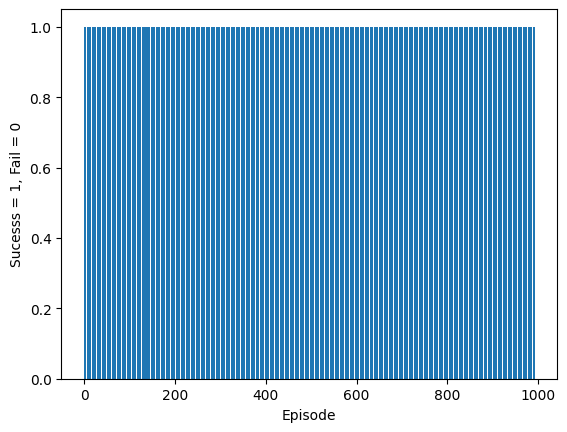

In [3]:
## openai gym init
# is_slippery = True; stochastic environment

# desc=["SFFF", 
#       "FHFH", 
#       "FFFH", 
#       "HFFG"]

env = gym.make("FrozenLake-v1", desc=None,
            #    render_mode = "human",
               map_name = "4x4", is_slippery = False)

## Deterministic policy dictionary
policy = {0: 1, 1: 2, 2: 1, 3: 0, 
          4: 1, 6: 1, 8: 2, 9: 1, 
          10: 1, 13: 2, 14: 2}

scores = []
stochastic = False

for i in range(1000):
    if i >= 990:
        env = gym.make("FrozenLake-v1", desc=None,
               render_mode = "human",
               map_name = "4x4", is_slippery = False)
        
    if keyboard.is_pressed("q"):
        print("Exiting the environment.....")
        break

    terminated, truncated = False, False
    s, info = env.reset() # obs = 0
    score = 0

    while not terminated and not truncated:
        if stochastic:
            action = env.action_space.sample()
        else:
            action = policy[s]

        s_, reward, terminated, truncated, info = env.step(action)
        score += reward
        s = s_

    scores.append(score)
    # time.sleep(0.5)

pygame.quit()   
env.close()

plt.bar(np.arange(len(scores)), scores)
plt.xlabel("Episode")
plt.ylabel("Sucesss = 1, Fail = 0")
plt.show()

## 가치 평가 (Policy evaluation)

In [5]:
## Policy evaluation
## deterministic world : is_slippery =  False
env = gym.make("FrozenLake-v1", desc = None,
               map_name="4x4", is_slippery = False)

num_states = env.observation_space.n # 16
num_actions = env.action_space.n
transitions = env.unwrapped.P # (probability_1, next_state_1, reward_1, is_terminal_1)
print("num_states = ", num_states)
print("num_actions = ", num_actions)
print("="*50)
print('transitions = \n' )
transitions 

num_states =  16
num_actions =  4
transitions = 



{0: {0: [(1.0, 0, 0.0, False)],
  1: [(1.0, 4, 0.0, False)],
  2: [(1.0, 1, 0.0, False)],
  3: [(1.0, 0, 0.0, False)]},
 1: {0: [(1.0, 0, 0.0, False)],
  1: [(1.0, 5, 0.0, True)],
  2: [(1.0, 2, 0.0, False)],
  3: [(1.0, 1, 0.0, False)]},
 2: {0: [(1.0, 1, 0.0, False)],
  1: [(1.0, 6, 0.0, False)],
  2: [(1.0, 3, 0.0, False)],
  3: [(1.0, 2, 0.0, False)]},
 3: {0: [(1.0, 2, 0.0, False)],
  1: [(1.0, 7, 0.0, True)],
  2: [(1.0, 3, 0.0, False)],
  3: [(1.0, 3, 0.0, False)]},
 4: {0: [(1.0, 4, 0.0, False)],
  1: [(1.0, 8, 0.0, False)],
  2: [(1.0, 5, 0.0, True)],
  3: [(1.0, 0, 0.0, False)]},
 5: {0: [(1.0, 5, 0, True)],
  1: [(1.0, 5, 0, True)],
  2: [(1.0, 5, 0, True)],
  3: [(1.0, 5, 0, True)]},
 6: {0: [(1.0, 5, 0.0, True)],
  1: [(1.0, 10, 0.0, False)],
  2: [(1.0, 7, 0.0, True)],
  3: [(1.0, 2, 0.0, False)]},
 7: {0: [(1.0, 7, 0, True)],
  1: [(1.0, 7, 0, True)],
  2: [(1.0, 7, 0, True)],
  3: [(1.0, 7, 0, True)]},
 8: {0: [(1.0, 8, 0.0, False)],
  1: [(1.0, 12, 0.0, True)],
  2: [(

In [6]:
V = np.zeros(num_states)
pi = np.ones([num_states, num_actions])*0.25
# print(pi[0])
# list(enumerate(pi[0]))
# [0.25 0.25 0.25 0.25]
# [(0, 0.25), (1, 0.25), (2, 0.25), (3, 0.25)]

In [10]:
gamma = 0.95
theta = 1e-3
count = 0

while True:
    delta = 0
    count += 1
    for s in range(num_states):
        old_value = V[s]
        new_value = 0

        for a, prob_action in enumerate(pi[s]): # [(0, 0.25), (1, 0.25), (2, 0.25), (3, 0.25)]
            for prob_environ, s_, reward, terminated in transitions[s][a]:
                new_value += prob_action*prob_environ*(reward + gamma*V[s_])
        V[s] = new_value

        delta = max(delta, np.abs(old_value - V[s]))
        # print(f"V({count}) = ", V)
        # time.sleep(0.5)

    if delta <= theta: # 수렴조건
        break 


Optimal Value = 
         0       1       2       3
0  0.0055  0.0056  0.0133  0.0058
1  0.0091  0.0000  0.0322  0.0000
2  0.0246  0.0705  0.1224  0.0000
3  0.0000  0.1504  0.4128  0.0000


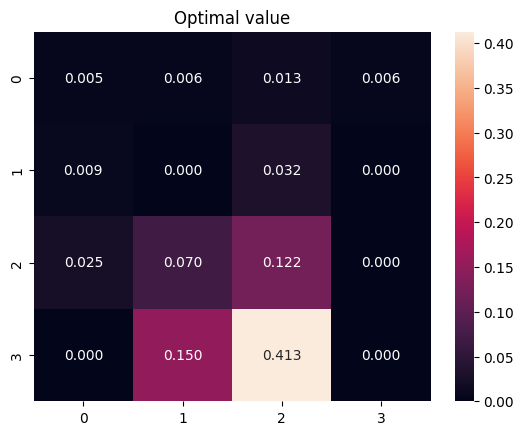

In [13]:
df = pd.DataFrame(V.round(4).reshape(4, 4))
# df = (pd.DataFrame(V.reshape(8, 8))*1000).round(2)

print("Optimal Value = \n", df)

sns.heatmap(df, annot=True, fmt = ".3f")
plt.title("Optimal value")
plt.show()

## 정책 반복 (Policy iteration)

In [14]:
env = gym.make("FrozenLake-v1", desc = None,
               map_name = "4x4", is_slippery = False)

num_states = env.observation_space.n
num_actions = env.action_space.n
transitions = env.unwrapped.P


print("num_states = ", num_states)
print("num_actions = ", num_actions) 
print("="*50)
print("transitions = ")
transitions

num_states =  16
num_actions =  4
transitions = 


{0: {0: [(1.0, 0, 0.0, False)],
  1: [(1.0, 4, 0.0, False)],
  2: [(1.0, 1, 0.0, False)],
  3: [(1.0, 0, 0.0, False)]},
 1: {0: [(1.0, 0, 0.0, False)],
  1: [(1.0, 5, 0.0, True)],
  2: [(1.0, 2, 0.0, False)],
  3: [(1.0, 1, 0.0, False)]},
 2: {0: [(1.0, 1, 0.0, False)],
  1: [(1.0, 6, 0.0, False)],
  2: [(1.0, 3, 0.0, False)],
  3: [(1.0, 2, 0.0, False)]},
 3: {0: [(1.0, 2, 0.0, False)],
  1: [(1.0, 7, 0.0, True)],
  2: [(1.0, 3, 0.0, False)],
  3: [(1.0, 3, 0.0, False)]},
 4: {0: [(1.0, 4, 0.0, False)],
  1: [(1.0, 8, 0.0, False)],
  2: [(1.0, 5, 0.0, True)],
  3: [(1.0, 0, 0.0, False)]},
 5: {0: [(1.0, 5, 0, True)],
  1: [(1.0, 5, 0, True)],
  2: [(1.0, 5, 0, True)],
  3: [(1.0, 5, 0, True)]},
 6: {0: [(1.0, 5, 0.0, True)],
  1: [(1.0, 10, 0.0, False)],
  2: [(1.0, 7, 0.0, True)],
  3: [(1.0, 2, 0.0, False)]},
 7: {0: [(1.0, 7, 0, True)],
  1: [(1.0, 7, 0, True)],
  2: [(1.0, 7, 0, True)],
  3: [(1.0, 7, 0, True)]},
 8: {0: [(1.0, 8, 0.0, False)],
  1: [(1.0, 12, 0.0, True)],
  2: [(

In [15]:
V = np.zeros(num_states)
pi = np.ones([num_states, num_actions])*0.25
print('V = ', V)
print()
print("pi = \n", pi)

V =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

pi = 
 [[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]


iteration = 1
iteration = 2
converge = True
Optimal State value = 
           0         1         2         3
0  0.773781  0.814506  0.857375  0.814506
1  0.814506  0.000000  0.902500  0.000000
2  0.857375  0.902500  0.950000  0.000000
3  0.000000  0.950000  1.000000  0.000000


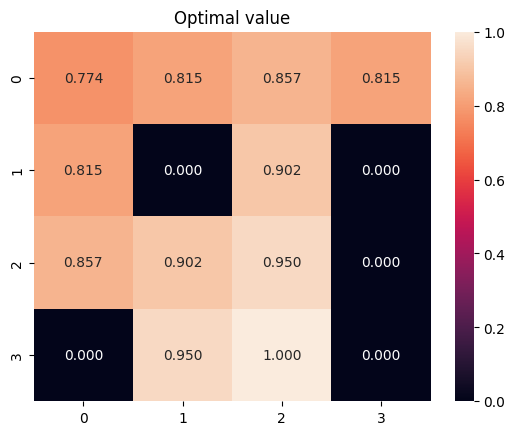


Optimal Action = 
 [[1 2 1 0]
 [1 0 1 0]
 [2 1 1 0]
 [0 2 2 0]]


In [16]:
V = np.zeros(num_states)
pi = np.ones([num_states, num_actions])*0.25

gamma = 0.95
theta = 1e-5 #0.00001
policy_converge = False

count = 0
while not policy_converge:
    count += 1
    # V(s) evaluation converge
    while True:
        delta = 0
        for s in range(num_states):
            old_value  = V[s]
            new_value = 0

            for a, prob_action in enumerate(pi[s]):

                for prob_environ, s_, reward, terminated_ in transitions[s][a]:
                    new_value += prob_action*prob_environ*(reward + gamma*V[s_])
            V[s] = new_value
            
            delta = max(delta, np.abs(old_value - V[s]))

        if delta < theta:
            break


    ## pi(a|s) update, 
    old_pi = np.copy(pi) ## 주소값
    # old_pi = pi ## 주소값

    for s in range(num_states):

        new_action_values = np.zeros(num_actions) # []

        for a in range(num_actions):
            for prob_environ, s_, reward, _ in transitions[s][a]:
                new_action_values[a] += prob_environ*(reward + gamma* V[s_])

        new_action = np.argmax(new_action_values) # 2
      
        pi[s] = np.eye(num_actions)[new_action]

    print("iteration = {}".format(count))    
    # print(pi)
    # time.sleep(0.5)

    if (old_pi == pi).all():
        print("converge = True")
        policy_converge = True


## Value
df = pd.DataFrame(V.reshape(4, 4))
print("Optimal State value = \n", df)
sns.heatmap(df, annot=True, fmt = ".3f")
plt.title("Optimal value")
plt.show()

## Policy
# print("Optimal policy = \n", pi)
print()
print("Optimal Action = \n", np.argmax(pi, axis = 1).reshape(4, 4))



## 가치 반복 (Valu iteration)

In [17]:
env = gym.make('FrozenLake-v1', desc = None,
               map_name = "4x4", is_slippery = False)

num_states = env.observation_space.n #16
num_actions = env.action_space.n # 4
transitions = env.unwrapped.P

Optimal Value = 
 [0.77378094 0.81450625 0.857375   0.81450625 0.81450625 0.
 0.9025     0.         0.857375   0.9025     0.95       0.
 0.         0.95       1.         0.        ]
Optimal Policy = 
 [[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]
Optimal Action = 
 [[1 2 1 0]
 [1 0 1 0]
 [2 1 1 0]
 [0 2 2 0]]


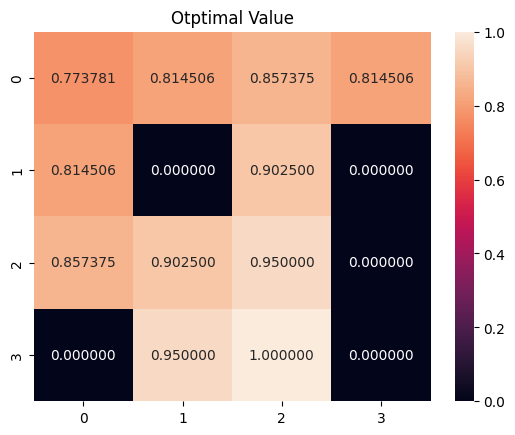

In [18]:
## State value function
V = np.zeros(num_states) 

gamma = 0.95
theta = 1e-3


while True:
    delta = 0

    for s in range(num_states):
        old_value = V[s]
        new_action_values = np.zeros(num_actions)

        for a in range(num_actions):
            
            for prob_environ, s_, reward, _ in transitions[s][a]:
                new_action_values[a] += prob_environ*(reward + gamma*V[s_])

        v_max = max(new_action_values)
        V[s] = v_max        
        delta = max(delta, np.abs(old_value - v_max))

    if delta < theta:
        break



# pi control
pi = np.ones([num_states, num_actions])

for s in range(num_states):

    action_values = np.zeros(num_actions)

    for a in range(num_actions):
        for prob_environ, s_, reward, _ in transitions[s][a]:
            action_values[a] += prob_environ*(reward + gamma*V[s_])

    new_action = np.argmax(action_values)
    pi[s] = np.eye(num_actions)[new_action]



## value
df = pd.DataFrame(V.reshape(4, 4))
print("Optimal Value = \n", V)

## Policy
print("Optimal Policy = \n", pi)
print("Optimal Action = \n", np.argmax(pi, axis = 1).reshape(4, 4))

## heatmap
sns.heatmap(df, annot=True, fmt = "f")
plt.title("Otptimal Value")
plt.show()